# CLIMA Y KILÓMETROS: ANÁLISIS DEL IMPACTO METEOROLÓGICO EN LA FRECUENCIA DE VIAJES. 

# DESCRIPCIÓN 
En el contexto de la industria de los viajes compartidos, el análisis de datos es fundamental para comprender las dinámicas del mercado y optimizar la toma de decisiones. Estoy trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en la competitiva ciudad de Chicago. Mi tarea es identificar patrones en la información disponible para entender mejor las preferencias de los pasajeros y evaluar el impacto de factores externos, como el clima, en la demanda de viajes.

El presente proyecto tiene como objetivo explorar y analizar los datos de nuestros competidores y probar una hipótesis específica relacionada con el impacto del clima en la duración de los viajes. A través de un análisis exhaustivo de los datos, buscamos obtener información valiosa que nos permita mejorar nuestras operaciones y ofrecer un servicio más eficiente y atractivo para nuestros usuarios.

Para lograr esto, utilizaremos una combinación de técnicas de análisis de datos, incluyendo la exploración de conjuntos de datos proporcionados por la competencia y la aplicación de métodos estadísticos para probar la hipótesis propuesta. Este enfoque nos permitirá no solo identificar tendencias y patrones clave en el comportamiento de los usuarios, sino también entender cómo las condiciones climáticas pueden influir en la duración y frecuencia de los viajes.

## Diccionario de datos. 
`project_sql_result_01.csv`:

 - `'company_name'`: nombre de la empresa de taxis

 - `'trips_amount'`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

`project_sql_result_04.csv`

 - `'dropoff_location_name'`: barrios de Chicago donde finalizaron los viajes

 - `'average_trips'`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
 
`project_sql_result_07.csv`: En esta base de dato se contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.

 - `'start_ts'`: fecha y hora de la recogida
 - `'weather_conditions'`: condiciones climáticas en el momento en el que comenzó el viaje
 - `'duration_seconds'`: duración del viaje en segundos

# 1.1  Inicialización 

In [1]:
# Cargar todas las librerías a usar en el proyecto. 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st
import seaborn as sns

# 1.2 Cargar datos. 

In [2]:
# Carga los archivos
trips_data = pd.read_csv('/datasets/project_sql_result_01.csv')
location_data = pd.read_csv('/datasets/project_sql_result_04.csv')
weather_data = pd.read_csv('/datasets/project_sql_result_07.csv')

# 1.3 Análisis de los datos

In [3]:
#Obtener la inofrmación de las bases de datos  con la cual se esta trabajando 
trips_data.info()
trips_data.describe()
print()
print('------------------------------------------------------------------')
location_data.info()
location_data.describe()
print()
print('------------------------------------------------------------------')
weather_data.info()
weather_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [4]:
# Obtener las 10 primeras filas de las bases de datos 
trips_data.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [5]:
# Obtener las 10 primeras filas del base de datos 
location_data.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
# Obtener las 10 primeras filas del base de datos 
weather_data.head(20)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


# 1.4 Verificación de los datos. 

In [7]:
# Redondear los valores de la columna 'average_trips' a 2 decimales
location_data['average_trips'] = location_data['average_trips'].round(2)

In [8]:
# Verifiación de los cambios 
location_data.head()

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90


In [9]:
#Verificación de que no haya duplicado. 

trips_data_dup = trips_data.duplicated().sum()
print(f'Se encontro que hay: {trips_data_dup} duplicados en el DataFrame de Trips Data')

print('---------------------------------------------------------')
location_data_dup = location_data.duplicated().sum()
print(f'Se encotro que hay: {location_data_dup} duplicados en el DataFrame de Loction Data')
print('---------------------------------------------------------')

weather_data_dup = weather_data.duplicated().sum()
print(f'Se encontró que hay: {weather_data_dup} duplicados en el DataFrame de Weather Data')

Se encontro que hay: 0 duplicados en el DataFrame de Trips Data
---------------------------------------------------------
Se encotro que hay: 0 duplicados en el DataFrame de Loction Data
---------------------------------------------------------
Se encontró que hay: 197 duplicados en el DataFrame de Weather Data


Se visualizo que hay 197 duplicados en el DataFrame de weather data, con esta información se tendra que eliminar los duplicados haya en dicho dataframe para poder tener un mejor análisis. 

In [10]:
# Eliminar duplicados en weather_data
weather_data_cleaned = weather_data.drop_duplicates()

# Verificar si se eliminaron los duplicados
print(f"Duplicados después de la limpieza: {weather_data_cleaned.duplicated().sum()}")


Duplicados después de la limpieza: 0


In [11]:
#Convertir los datos 
weather_data['start_ts'] = pd.to_datetime(weather_data['start_ts'], errors='coerce')
weather_data['duration_seconds'] = weather_data['duration_seconds'].astype(int)

In [12]:
#verificación de los cambios 
weather_data.info()
print()
print()
weather_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB




,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


Se realizó esto para que start_ts se convierta en un formato de fecha y hora, y que duration_seconds se muestre como un entero para poder analizarlo de mejor manera. 

In [13]:
#comprobar los valores  ausentes 
trips_mis_val = trips_data.isna().sum()
print(trips_mis_val)
print()
print()
location_mis_val = location_data.isna().sum()
print(location_mis_val)
print()
print()
weather_mis_val = weather_data.isna().sum()
print(weather_mis_val)

company_name    0
trips_amount    0
dtype: int64


dropoff_location_name    0
average_trips            0
dtype: int64


start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


 Se realizó este análisis para poder comprobar de que con las bases de datos con las que se esta trabajando no tenga valores ausentes y en el caso de que tuvieran. Se tendría que rellenarlos

# 2. Identificación de los top 10 

In [14]:
top_location = location_data.nlargest(10, 'average_trips')
print(top_location)

  dropoff_location_name  average_trips
0                  Loop       10727.47
1           River North        9523.67
2         Streeterville        6664.67
3             West Loop        5163.67
4                O'Hare        2546.90
5             Lake View        2420.97
6            Grant Park        2068.53
7         Museum Campus        1510.00
8            Gold Coast        1364.23
9    Sheffield & DePaul        1259.77


# 3. Gráfica

In [15]:
#filtrar las 10 companias con mayores viajes. 
top_company = trips_data.nlargest(10, 'trips_amount')
print(top_company)


                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


<Figure size 1000x600 with 0 Axes>

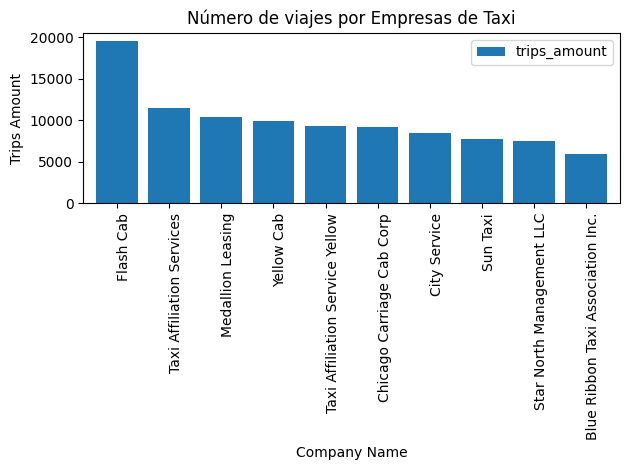

In [16]:
# Graficar empresas de taxis y número de viajes
plt.figure(figsize=(10, 6))

top_company.plot(kind='bar',
                x = 'company_name',
                y='trips_amount', 
                width=0.8,
                xlabel = 'Company Name', 
                ylabel = 'Trips Amount',
                title = 'Número de viajes por Empresas de Taxi')
plt.xticks(rotation=90,ha='left')
plt.tight_layout()
plt.show()

Dado el gran número de compañías analizadas, se decidió enfocar el estudio en los top 10 principales. En este análisis, se identificó a Flash Card como el principal competidor de Zuber, con un total de 19,558 viajes en solo dos días. Este dato sugiere que sería interesante investigar qué tipo de servicio ofrece Flash Card y por qué los usuarios la prefieren sobre otras compañías. Además, es importante destacar que Taxi Affiliation Services y Medallion Leasing también son competidores significativos en el mercado.

<Figure size 1000x600 with 0 Axes>

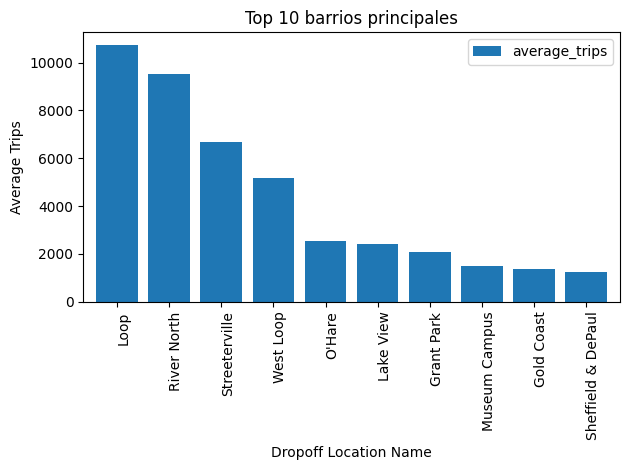

In [17]:
# Graficar los 10 barrios principales por número de finalizaciones
plt.figure(figsize=(10, 6))

top_location.plot(kind='bar',
                x = 'dropoff_location_name',
                y='average_trips', 
                width=0.8,
                xlabel = 'Dropoff Location Name', 
                ylabel = 'Average Trips',
                title = 'Top 10 barrios principales')
plt.xticks(rotation=90,ha='left')
plt.tight_layout()
plt.show()

Con esta gráfica se puede analizar el top 10 de las mejores ubicaciones de destino en cada barrio de Chicago durante noviembre de 2017. El barrio más destacado es Loop, que cuenta con un promedio de 10,727.47 viajes. Este resultado sugiere que Loop es un destino popular y podría estar relacionado con su papel como centro económico y comercial de la ciudad.

Otros barrios con un alto promedio de viajes incluyen River North con 9,523.67 viajes y Streeterville con 6,664.67 viajes, ambos conocidos por su vida nocturna y atracciones turísticas. West Loop sigue con 5,163.67 viajes, un área en crecimiento en términos de restaurantes y oficinas.

# 4 Prueba la hipótesis

Se planteara las hipótesis nula y alternativa. 

Hipótesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

Hipótesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

In [21]:
#Primer paso: filtrar los datos para los días sábados lluviosos y no
rainy_saturday = weather_data[
    (weather_data['weather_conditions'] == 'Bad') &
    (weather_data['start_ts'].dt.day_name() == 'Saturday')
]

non_rainy_saturday = weather_data[
    (weather_data['weather_conditions'] != 'Bad') &
    (weather_data['start_ts'].dt.day_name() == 'Saturday')
]

#Segundo paso: Tomar la Duración del vaije
rainy_duration = rainy_saturday['duration_seconds']
non_rainy_duration = non_rainy_saturday['duration_seconds']

#Tercer paso:  Realizar la prueba de Levene para comparar varianzas
levene_stat, levene_p_value = st.levene(rainy_duration, non_rainy_duration)

#Cuarto paso: Decidir si las varianzas son iguales o no. 
equal_var = levene_p_value > 0.05

#Quinto paso: Realizar  la prueba t para muestras independiente 
t_stat, p_value = st.ttest_ind(rainy_duration, non_rainy_duration, equal_var = equal_var) 

#Sexto paso: Imprimir los resultados obtenidos de la prueba de Levene 
print(f'Estadístico de Levene: {levene_stat}')
print(f'Valor p de Levene: {levene_p_value}')
print(f"¿Las varianzas son iguales?:  {'Sí' if equal_var else 'No'}")
print()
print()

#Septimo paso: Imprimir los resultados obtenidos de la prueba t 
print(f"Estadístico de t: {t_stat}")
print(f"Valor p: {p_value}")
print()
print()

#Octavo paso: Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.")
else:
    print("No rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.")

Estadístico de Levene: 0.38853489683656073
Valor p de Levene: 0.5332038671974493
¿Las varianzas son iguales?:  Sí


Estadístico de t: 6.946177714041499
Valor p: 6.517970327099473e-12


Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.


# 5 Conclusión.

Al analizar el comportamiento del mercado y las dinámicas del servicio de Zuber en Chicago, se identificaron áreas clave para optimizar y mejorar la oferta de la empresa. Este análisis proporciona una visión integral para orientar estrategias que permitan ofrecer un servicio más eficiente y acorde a las necesidades de los clientes.

Se destacó que el barrio más concurrido es Loop, un destino popular probablemente relacionado con su papel como centro económico y comercial de la ciudad. Este hallazgo sugiere que Zuber podría beneficiarse al enfocar más recursos, como aumentar la disponibilidad de unidades, en esta área para satisfacer mejor la demanda de los usuarios.

Además, es importante examinar en profundidad por qué Flash Card es la opción preferida por los usuarios. Esto podría estar relacionado con factores como el precio, la calidad del servicio, o las características de las unidades utilizadas. Comprender estos aspectos permitirá a Zuber ajustar su oferta y mejorar la satisfacción del cliente.

Finalmente, en la hipótesis planteada sobre la duración de los viajes los sábados lluviosos desde Loop hasta el Aeropuerto Internacional O'Hare, se observó que los tiempos de viaje se alargan en estas condiciones. Este resultado subraya la importancia de considerar el impacto del clima en la planificación y gestión de la flota para minimizar los tiempos de espera y mejorar la experiencia del usuario en días con condiciones adversas.